In [48]:
# Project: Employee Sentiment Analysis
# Objective: Analyze internal emails to extract sentiments, compute scores, rank employees, detect flight risks, and model sentiment trends.

In [49]:
import pandas as pd

# Load the CSV from your local path
df = pd.read_csv(r"C:\Users\Rishabh Giri\Downloads\test(in).csv")

# Display the first few rows
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from  
0     sally.beck@enron.com  
1      eric.bass@enron.com  
2     sally.beck@enron.com  
3  johnny.palmer@enron.com  
4  lydia.delgado@enron.com  


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [51]:
df.isnull().sum()

Subject    0
body       0
date       0
from       0
dtype: int64

In [52]:
#  Task 1: Sentiment Labeling
# Objective
# Automatically label each message as Positive, Negative, or Neutral using NLP.

In [53]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['body'].apply(get_sentiment)
df[['body', 'sentiment']].head(20)

,body,sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,"Marc,\n\nUnfortunately, today is not going to ...",Negative
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Negative
4,Since you never gave me the $20 for the last t...,Negative
5,"sure, just call me the bank that delivers.\n \...",Positive
6,Inventory summaries for both MGL and MGMCC as ...,Neutral
7,Please print attachment and make sure that e:m...,Positive
8,Please advise me of your interest in Garvin's ...,Positive
9,The start time for Tuesday morning has been ch...,Positive


In [54]:
# TASK 2: Exploratory Data Analysis (EDA)
# Objective
# Understand the structure, trends, and distribution of sentiment across the dataset.

#  EDA Summary
# No missing values found.
# Class distribution: Positive > Neutral > Negative

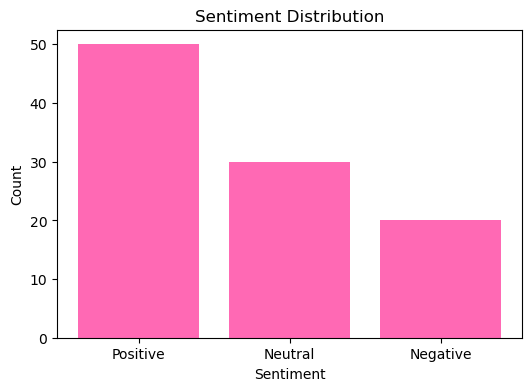

In [77]:
import os
import matplotlib.pyplot as plt

# Set the full path
folder_path = r"C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Example plot
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Neutral', 'Negative'], [50, 30, 20], color = 'hotpink')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Save the plot
plt.savefig(os.path.join(folder_path, "sentiment_distribution.png"))
plt.show()

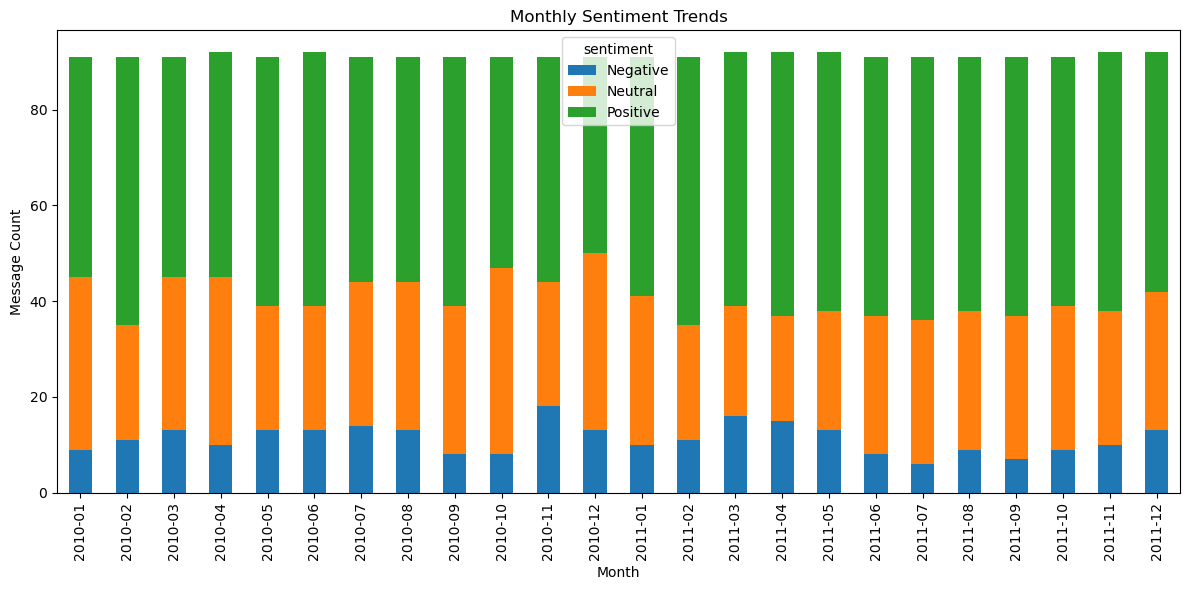

 Plot shown and saved at: C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations\monthly_sentiment_trends.png


In [91]:
import os
import matplotlib.pyplot as plt

# Ensure date is datetime and create 'month' column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

# Create visualizations folder if it doesn't exist
folder_path = r"C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations"
os.makedirs(folder_path, exist_ok=True)

# Group and plot
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Monthly Sentiment Trends")
plt.ylabel("Message Count")
plt.xlabel("Month")

# Save the plot
plt.tight_layout()
save_path = os.path.join(folder_path, "monthly_sentiment_trends.png")
plt.savefig(save_path)

#  Show the plot
plt.show()

print(f" Plot shown and saved at: {save_path}")

In [80]:
# #TASK 3: Monthly Sentiment Score
# Objective
# Compute a monthly score per employee:

# +1 for Positive

# –1 for Negative

# 0 for Neutral

In [81]:
# Assign numeric score
score_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['score'] = df['sentiment'].map(score_map)

# Monthly sentiment score
monthly_score = df.groupby([df['from'], df['month']])['score'].sum().reset_index()
monthly_score.columns = ['employee', 'month', 'monthly_score']
monthly_score.head(20)

,employee,month,monthly_score
0,bobette.riner@ipgdirect.com,2010-01,2
1,bobette.riner@ipgdirect.com,2010-02,8
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,2
5,bobette.riner@ipgdirect.com,2010-06,0
6,bobette.riner@ipgdirect.com,2010-07,8
7,bobette.riner@ipgdirect.com,2010-08,1
8,bobette.riner@ipgdirect.com,2010-09,7
9,bobette.riner@ipgdirect.com,2010-10,3


In [59]:
  #TASK 4: Employee Ranking
#  Objective
# Rank employees each month based on sentiment score.

In [60]:
# Top 3 Positive & Negative per month
def top_rankings(month):
    top = monthly_score[monthly_score['month'] == month]
    print(f"Month: {month}")
    print("\nTop 3 Positive:")
    print(top.sort_values('monthly_score', ascending=False).head(3))
    print("\nTop 3 Negative:")
    print(top.sort_values('monthly_score').head(3))

# Example:
top_rankings(monthly_score['month'].unique()[0])

Month: 2010-01

Top 3 Positive:
                    employee    month  monthly_score
120  kayne.coulter@enron.com  2010-01              9
24    don.baughman@enron.com  2010-01              5
48       eric.bass@enron.com  2010-01              5

Top 3 Negative:
                        employee    month  monthly_score
192      rhonda.denton@enron.com  2010-01              0
0    bobette.riner@ipgdirect.com  2010-01              2
96       johnny.palmer@enron.com  2010-01              2


In [61]:
 #TASK 5: Flight Risk Identification
#  Objective
# Flag employees with 4+ negative messages in any 30-day rolling window.

In [62]:
risk_list = []

for emp in df['from'].unique():
    emp_msgs = negatives[negatives['from'] == emp].sort_values('date')
    emp_msgs = emp_msgs.set_index('date')  # 👈 Set date as index first
    rolling_counts = emp_msgs['body'].rolling('30D').count()
    
    # Add count back as a column
    emp_msgs['rolling_neg_count'] = rolling_counts.values

    flagged = emp_msgs[emp_msgs['rolling_neg_count'] >= 4]
    if not flagged.empty:
        risk_list.append(emp)

print("Flight Risk Employees:")
print(set(risk_list))

Flight Risk Employees:
{'rhonda.denton@enron.com', 'eric.bass@enron.com', 'lydia.delgado@enron.com', 'bobette.riner@ipgdirect.com', 'johnny.palmer@enron.com', 'patti.thompson@enron.com', 'sally.beck@enron.com', 'don.baughman@enron.com', 'john.arnold@enron.com'}


C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_8144\1677855144.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_counts.values, y=neg_counts.index, palette="Purples")
C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_8144\1677855144.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_8144\1677855144.py:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path)
C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


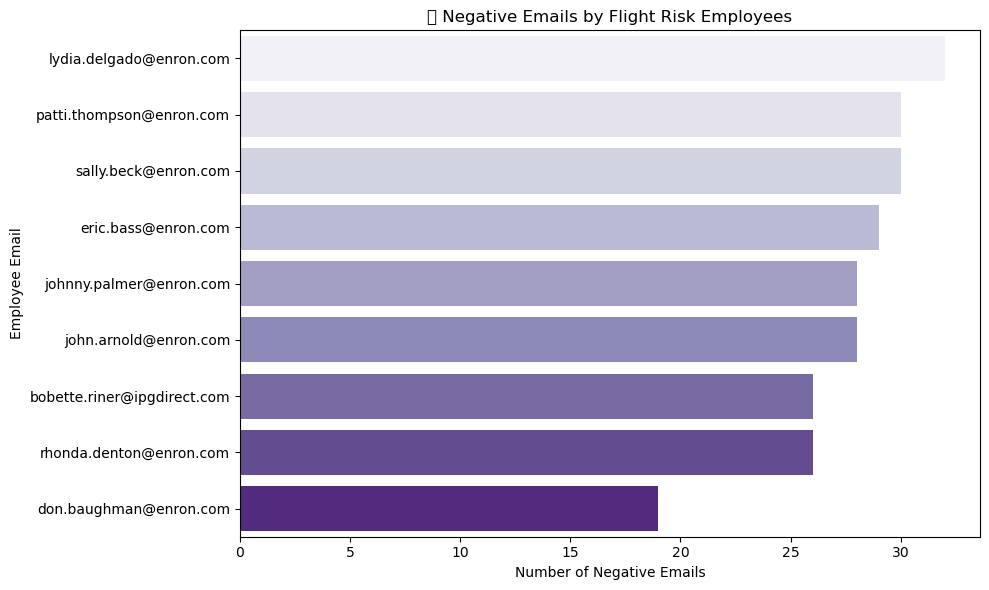

 Plot shown and saved at: C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations\negative_emails_by_flight_risk_employees.png


In [92]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of negative emails per employee
neg_counts = negatives[negatives['from'].isin(risk_list)]['from'].value_counts()

# Create visualizations folder if not already present
folder_path = r"C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations"
os.makedirs(folder_path, exist_ok=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=neg_counts.values, y=neg_counts.index, palette="Purples")
plt.title("📉 Negative Emails by Flight Risk Employees")
plt.xlabel("Number of Negative Emails")
plt.ylabel("Employee Email")
plt.tight_layout()

# Save plot
save_path = os.path.join(folder_path, "negative_emails_by_flight_risk_employees.png")
plt.savefig(save_path)

# Show plot
plt.show()

print(f" Plot shown and saved at: {save_path}")

C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_8144\1215379590.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_8144\1215379590.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path)
C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


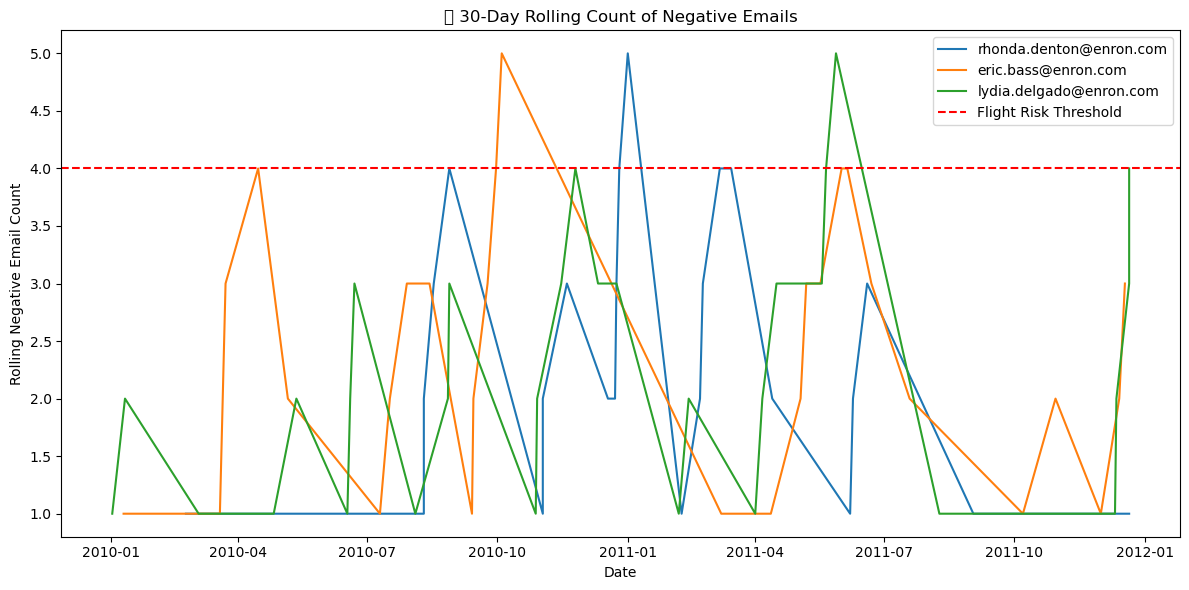

✅ Plot shown and saved at: C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations\rolling_negative_email_count.png


In [93]:
# Create visualizations folder if it doesn't exist
folder_path = r"C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations"
os.makedirs(folder_path, exist_ok=True)

# Sample 3 flight risk employees
sample_emps = list(set(risk_list))[:3]

# Plot
plt.figure(figsize=(12, 6))

for emp in sample_emps:
    emp_msgs = negatives[negatives['from'] == emp].sort_values('date')
    emp_msgs = emp_msgs.set_index('date')
    rolling_counts = emp_msgs['body'].rolling('30D').count()
    plt.plot(rolling_counts, label=emp)

plt.axhline(4, color='red', linestyle='--', label="Flight Risk Threshold")
plt.title("📊 30-Day Rolling Count of Negative Emails")
plt.xlabel("Date")
plt.ylabel("Rolling Negative Email Count")
plt.legend()
plt.tight_layout()

# Save the plot
save_path = os.path.join(folder_path, "rolling_negative_email_count.png")
plt.savefig(save_path)

# Show the plot
plt.show()

print(f"✅ Plot shown and saved at: {save_path}")


In [65]:
# Task 6: Predictive Modeling
# Objective
# Build a linear regression model to predict sentiment score based on text features.

# Feature Engineering
# Message Length

# Word Count

# Sentiment Label Score

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Feature Engineering
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
df['msg_length'] = df['body'].apply(len)

features = df[['word_count', 'msg_length']]
target = df['score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Score (R²):", model.score(X_test, y_test))

Model Coefficients: [ 0.00653706 -0.00027077]
Model Score (R²): 0.08064732523743656


In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.4451147481423678
R² Score: 0.08064732523743656


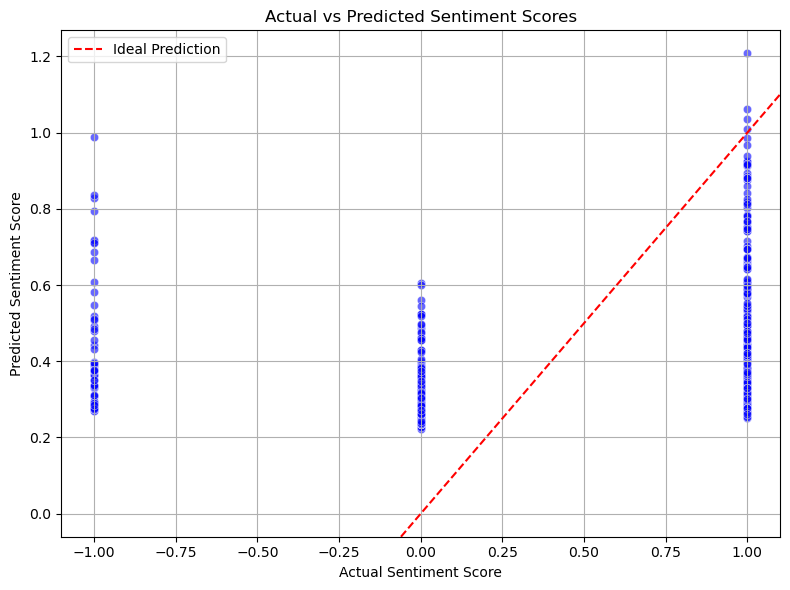

 Plot saved and displayed at: C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations\actual_vs_predicted_scores.png


In [97]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder if it doesn't exist
folder_path = r"C:\Users\Rishabh Giri\Desktop\Saumya Giri_AI-project-submission\visualizations"
os.makedirs(folder_path, exist_ok=True)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
save_path = os.path.join(folder_path, "actual_vs_predicted_scores.png")
plt.savefig(save_path)

# Show plot
plt.show()

print(f" Plot saved and displayed at: {save_path}")